# IA for HumanForYou - Projet IA A4

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.
Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.
Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.
Le direction fait donc appel à nous, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Énoncé du problème :

Quels sont les facteurs responsables de l'attrition des employés de l'entreprise ? En effectuant une analyse exploratoire des données (AED), nous pouvons trouver comment chaque caractéristique est responsable de l'attrition des employés de l'entreprise, puis en concevant des modèles ML, trouver la probabilité des caractéristiques pour l'attrition.

Objectif : 

Nous devons modéliser la probabilité d'attrition à l'aide d'algorithme . Les résultats ainsi obtenus seront utilisés par la direction pour comprendre quels changements elle devrait apporter à son lieu de travail, afin d'inciter la plupart de ses employés à rester.

Sommaire :
- Étape 1: Obtention et importation des Données.
- Étape 2: Nettoyage des données.
- Étape 3 : Analyse et visualisation statiques des données.
- Étape 4: Choisir le bon estimateur/algorithme pour notre cas
- Étape 5 : Évaluation des modèles

Étape 1: Obtention et importation des Données

In [7]:
# ====== Importation des modules nécessaires à la manipulation des données et à la représentation visuelle. ========

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler

C:\Users\user\AppData\Local\Temp\ipykernel_19164\404338099.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\user\AppData\Local\Temp\ipykernel_19164\404338099.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [8]:
# ====== Chargement des fichiers csv =========



lien_manager = "filtered_csv/csv_filtered/manager_survey_data_filtered.csv"
lien_employee = "filtered_csv/csv_filtered/employee_survey_check_filtered.csv"
lien_general_data = "filtered_csv/csv_filtered/general_data_dummies.csv"
lien_mean_time = "filtered_csv/csv_filtered/mean_working_h.csv"



general_data = pd.read_csv(lien_general_data )
employee_survey_data = pd.read_csv(lien_employee)
manager = pd.read_csv(lien_manager)
time = pd.read_csv(lien_mean_time)

In [9]:
employee_survey_data

Unnamed: 0  EmployeeID  EnvironmentSatisfaction  JobSatisfaction  \
0              0           1                      3.0              4.0   
1              1           2                      3.0              2.0   
2              2           3                      2.0              2.0   
3              3           4                      4.0              4.0   
4              4           5                      4.0              1.0   
...          ...         ...                      ...              ...   
4405        4405        4406                      4.0              1.0   
4406        4406        4407                      4.0              4.0   
4407        4407        4408                      1.0              3.0   
4408        4408        4409                      4.0              1.0   
4409        4409        4410                      1.0              3.0   

      WorkLifeBalance  
0                 2.0  
1                 4.0  
2                 1.0  
3                 3.0  
4                 3.0  
...               ...  
4405              3.0  
4406              3.0  
4407              3.0  
4408              3.0  
4409              NaN  

[4410 rows x 5 columns]

Unnamed: 0  EmployeeID  EnvironmentSatisfaction  JobSatisfaction  \
0              0           1                      3.0              4.0   
1              1           2                      3.0              2.0   
2              2           3                      2.0              2.0   
3              3           4                      4.0              4.0   
4              4           5                      4.0              1.0   
...          ...         ...                      ...              ...   
4405        4405        4406                      4.0              1.0   
4406        4406        4407                      4.0              4.0   
4407        4407        4408                      1.0              3.0   
4408        4408        4409                      4.0              1.0   
4409        4409        4410                      1.0              3.0   

      WorkLifeBalance  
0                 2.0  
1                 4.0  
2                 1.0  
3                 3.0  
4                 3.0  
...               ...  
4405              3.0  
4406              3.0  
4407              3.0  
4408              3.0  
4409              NaN  

[4410 rows x 5 columns]

In [10]:
# ====== Prétraitement des données ===========
# Joindre les différentes DataFrames
df_gen_emp = pd.merge(general_data,employee_survey_data,on='EmployeeID')
df_man_time = pd.merge(manager,time,on='EmployeeID')
df_merged = pd.merge(df_gen_emp,df_man_time,on='EmployeeID')


In [11]:
df_merged

Unnamed: 0_x_x  Age  Attrition  DistanceFromHome  Education  EmployeeID  \
0                  0   51          0                 6          2           1   
1                  1   31          1                10          1           2   
2                  2   32          0                17          4           3   
3                  3   38          0                 2          5           4   
4                  4   32          0                10          1           5   
...              ...  ...        ...               ...        ...         ...   
4405            4405   42          0                 5          4        4406   
4406            4406   29          0                 2          4        4407   
4407            4407   25          0                25          2        4408   
4408            4408   42          0                18          2        4409   
4409            4409   40          0                28          3        4410   

      EmployeeCount  Gender  JobLevel  MonthlyIncome  ...  \
0                 1       1         1         131160  ...   
1                 1       1         1          41890  ...   
2                 1       0         4         193280  ...   
3                 1       0         3          83210  ...   
4                 1       0         1          23420  ...   
...             ...     ...       ...            ...  ...   
4405              1       1         1          60290  ...   
4406              1       0         1          26790  ...   
4407              1       0         2          37020  ...   
4408              1       0         1          23980  ...   
4409              1       0         2          54680  ...   

      MaritalStatus_Married  MaritalStatus_Single  Unnamed: 0_y_x  \
0                         1                     0               0   
1                         0                     1               1   
2                         1                     0               2   
3                         1                     0               3   
4                         0                     1               4   
...                     ...                   ...             ...   
4405                      0                     1            4405   
4406                      0                     0            4406   
4407                      1                     0            4407   
4408                      0                     0            4408   
4409                      0                     0            4409   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0                         3.0              4.0              2.0   
1                         3.0              2.0              4.0   
2                         2.0              2.0              1.0   
3                         4.0              4.0              3.0   
4                         4.0              1.0              3.0   
...                       ...              ...              ...   
4405                      4.0              1.0              3.0   
4406                      4.0              4.0              3.0   
4407                      1.0              3.0              3.0   
4408                      4.0              1.0              3.0   
4409                      1.0              3.0              NaN   

      Unnamed: 0_x_y  average_m_rating  Unnamed: 0_y_y  MeanWorkingTime  
0                  0               3.0               0         7.363301  
1                  1               3.0               1         8.077671  
2                  2               3.0               2         7.110486  
3                  3               2.5               3         7.275869  
4                  4               3.0               4         8.011352  
...              ...               ...             ...              ...  
4405            4405               3.0            4405         8.670373  
4406            4406               2.5            4406         6.111096  


Unnamed: 0_x_x  Age  Attrition  DistanceFromHome  Education  EmployeeID  \
0                  0   51          0                 6          2           1   
1                  1   31          1                10          1           2   
2                  2   32          0                17          4           3   
3                  3   38          0                 2          5           4   
4                  4   32          0                10          1           5   
...              ...  ...        ...               ...        ...         ...   
4405            4405   42          0                 5          4        4406   
4406            4406   29          0                 2          4        4407   
4407            4407   25          0                25          2        4408   
4408            4408   42          0                18          2        4409   
4409            4409   40          0                28          3        4410   

      EmployeeCount  Gender  JobLevel  MonthlyIncome  ...  \
0                 1       1         1         131160  ...   
1                 1       1         1          41890  ...   
2                 1       0         4         193280  ...   
3                 1       0         3          83210  ...   
4                 1       0         1          23420  ...   
...             ...     ...       ...            ...  ...   
4405              1       1         1          60290  ...   
4406              1       0         1          26790  ...   
4407              1       0         2          37020  ...   
4408              1       0         1          23980  ...   
4409              1       0         2          54680  ...   

      MaritalStatus_Married  MaritalStatus_Single  Unnamed: 0_y_x  \
0                         1                     0               0   
1                         0                     1               1   
2                         1                     0               2   
3                         1                     0               3   
4                         0                     1               4   
...                     ...                   ...             ...   
4405                      0                     1            4405   
4406                      0                     0            4406   
4407                      1                     0            4407   
4408                      0                     0            4408   
4409                      0                     0            4409   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0                         3.0              4.0              2.0   
1                         3.0              2.0              4.0   
2                         2.0              2.0              1.0   
3                         4.0              4.0              3.0   
4                         4.0              1.0              3.0   
...                       ...              ...              ...   
4405                      4.0              1.0              3.0   
4406                      4.0              4.0              3.0   
4407                      1.0              3.0              3.0   
4408                      4.0              1.0              3.0   
4409                      1.0              3.0              NaN   

      Unnamed: 0_x_y  average_m_rating  Unnamed: 0_y_y  MeanWorkingTime  
0                  0               3.0               0         7.363301  
1                  1               3.0               1         8.077671  
2                  2               3.0               2         7.110486  
3                  3               2.5               3         7.275869  
4                  4               3.0               4         8.011352  
...              ...               ...             ...              ...  
4405            4405               3.0            4405         8.670373  
4406            4406               2.5            4406         6.111096  


In [12]:
# Suppression des colonnes en trop
df_merged.drop("Unnamed: 0_x_x",axis=1,inplace=True)
df_merged.drop("Unnamed: 0_x_y",axis=1,inplace=True)
df_merged.drop("Unnamed: 0_y_x",axis=1,inplace=True)
df_merged.drop("Unnamed: 0_y_y",axis=1,inplace=True)
df_merged.drop("EmployeeID",axis=1,inplace=True)
df_merged.drop("EmployeeCount",axis=1,inplace=True)

Data cleaning:
Il est important de nettoyer les données en éliminant les doublons, en gérant les valeurs manquantes, en détectant et en supprimant les données aberrantes (outliers), et en corrigeant les erreurs de syntaxe et les fautes de frappe.
Pour cela on va utiliser la bibliothèque pandas:

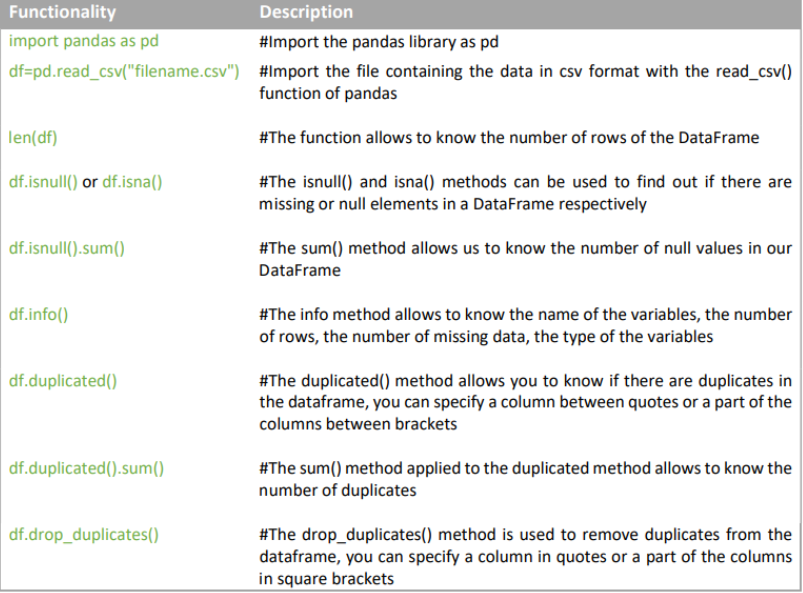
   
    

In [13]:
df_merged['WorkLifeBalance'] = df_merged['WorkLifeBalance'].fillna(df_merged['WorkLifeBalance'].median())

In [14]:
df_merged['EnvironmentSatisfaction'] = df_merged['EnvironmentSatisfaction'].fillna(df_merged['EnvironmentSatisfaction'].median())

In [15]:
df_merged['WorkLifeBalance'] = df_merged['WorkLifeBalance'].fillna(df_merged['WorkLifeBalance'].median())
df_merged['JobSatisfaction'] = df_merged['JobSatisfaction'].fillna(df_merged['JobSatisfaction'].median())

In [16]:
#Dernier check pour être sur qu'il n'y a pas de valeurs nulles.
df_merged.isna().sum()

Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Dir

Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Dir

In [17]:
df_merged.describe()


Age    Attrition  DistanceFromHome    Education       Gender  \
count  4410.000000  4410.000000       4410.000000  4410.000000  4410.000000   
mean     36.923810     0.161224          9.192517     2.912925     0.400000   
std       9.133301     0.367780          8.105026     1.023933     0.489954   
min      18.000000     0.000000          1.000000     1.000000     0.000000   
25%      30.000000     0.000000          2.000000     2.000000     0.000000   
50%      36.000000     0.000000          7.000000     3.000000     0.000000   
75%      43.000000     0.000000         14.000000     4.000000     1.000000   
max      60.000000     1.000000         29.000000     5.000000     1.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4410.000000        4410.000000   
mean      2.063946   65029.312925            2.691837          15.209524   
std       1.106689   47068.888559            2.493912           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StockOptionLevel  ...  JobRole_Sales Executive  \
count       4410.000000  ...              4410.000000   
mean           0.793878  ...                 0.221769   
std            0.851883  ...                 0.415483   
min            0.000000  ...                 0.000000   
25%            0.000000  ...                 0.000000   
50%            1.000000  ...                 0.000000   
75%            1.000000  ...                 0.000000   
max            3.000000  ...                 1.000000   

       JobRole_Sales Representative  MaritalStatus_Divorced  \
count                   4410.000000             4410.000000   
mean                       0.056463                0.222449   
std                        0.230839                0.415938   
min                        0.000000                0.000000   
25%                        0.000000                0.000000   
50%                        0.000000                0.000000   
75%                        0.000000                0.000000   
max                        1.000000                1.000000   

       MaritalStatus_Married  MaritalStatus_Single  EnvironmentSatisfaction  \
count            4410.000000           4410.000000              4410.000000   
mean                0.457823              0.319728                 2.725170   
std                 0.498274              0.466424                 1.089852   
min                 0.000000              0.000000                 1.000000   
25%                 0.000000              0.000000                 2.000000   
50%                 0.000000              0.000000                 3.000000   
75%                 1.000000              1.000000                 4.000000   
max                 1.000000              1.000000                 4.000000   

       JobSatisfaction  WorkLifeBalance  average_m_rating  MeanWorkingTime  
count      4410.000000      4410.000000       4410.000000      4410.000000  
mean          2.729478         2.763492          2.941837         7.732963  
std           1.098904         0.703541          0.400536         1.260293  
min           1.000000         1.000000          2.000000         5.647294  
25%           2.000000         2.000000          2.500000         6.788700  
50%           3.000000         3.000000          3.000000         7.481011  
75%           4.000000         3.000000          3.000000         8.292589  
max           4.000000         4.000000          4.000000        11.198906  

[8 rows x 38 columns]

Age    Attrition  DistanceFromHome    Education       Gender  \
count  4410.000000  4410.000000       4410.000000  4410.000000  4410.000000   
mean     36.923810     0.161224          9.192517     2.912925     0.400000   
std       9.133301     0.367780          8.105026     1.023933     0.489954   
min      18.000000     0.000000          1.000000     1.000000     0.000000   
25%      30.000000     0.000000          2.000000     2.000000     0.000000   
50%      36.000000     0.000000          7.000000     3.000000     0.000000   
75%      43.000000     0.000000         14.000000     4.000000     1.000000   
max      60.000000     1.000000         29.000000     5.000000     1.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4410.000000        4410.000000   
mean      2.063946   65029.312925            2.691837          15.209524   
std       1.106689   47068.888559            2.493912           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StockOptionLevel  ...  JobRole_Sales Executive  \
count       4410.000000  ...              4410.000000   
mean           0.793878  ...                 0.221769   
std            0.851883  ...                 0.415483   
min            0.000000  ...                 0.000000   
25%            0.000000  ...                 0.000000   
50%            1.000000  ...                 0.000000   
75%            1.000000  ...                 0.000000   
max            3.000000  ...                 1.000000   

       JobRole_Sales Representative  MaritalStatus_Divorced  \
count                   4410.000000             4410.000000   
mean                       0.056463                0.222449   
std                        0.230839                0.415938   
min                        0.000000                0.000000   
25%                        0.000000                0.000000   
50%                        0.000000                0.000000   
75%                        0.000000                0.000000   
max                        1.000000                1.000000   

       MaritalStatus_Married  MaritalStatus_Single  EnvironmentSatisfaction  \
count            4410.000000           4410.000000              4410.000000   
mean                0.457823              0.319728                 2.725170   
std                 0.498274              0.466424                 1.089852   
min                 0.000000              0.000000                 1.000000   
25%                 0.000000              0.000000                 2.000000   
50%                 0.000000              0.000000                 3.000000   
75%                 1.000000              1.000000                 4.000000   
max                 1.000000              1.000000                 4.000000   

       JobSatisfaction  WorkLifeBalance  average_m_rating  MeanWorkingTime  
count      4410.000000      4410.000000       4410.000000      4410.000000  
mean          2.729478         2.763492          2.941837         7.732963  
std           1.098904         0.703541          0.400536         1.260293  
min           1.000000         1.000000          2.000000         5.647294  
25%           2.000000         2.000000          2.500000         6.788700  
50%           3.000000         3.000000          3.000000         7.481011  
75%           4.000000         3.000000          3.000000         8.292589  
max           4.000000         4.000000          4.000000        11.198906  

[8 rows x 38 columns]

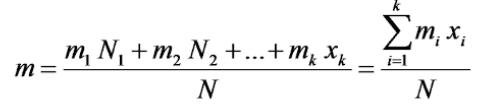

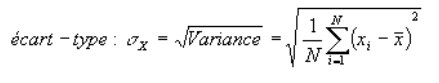

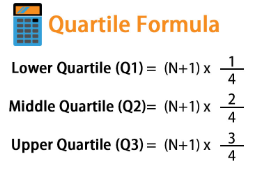

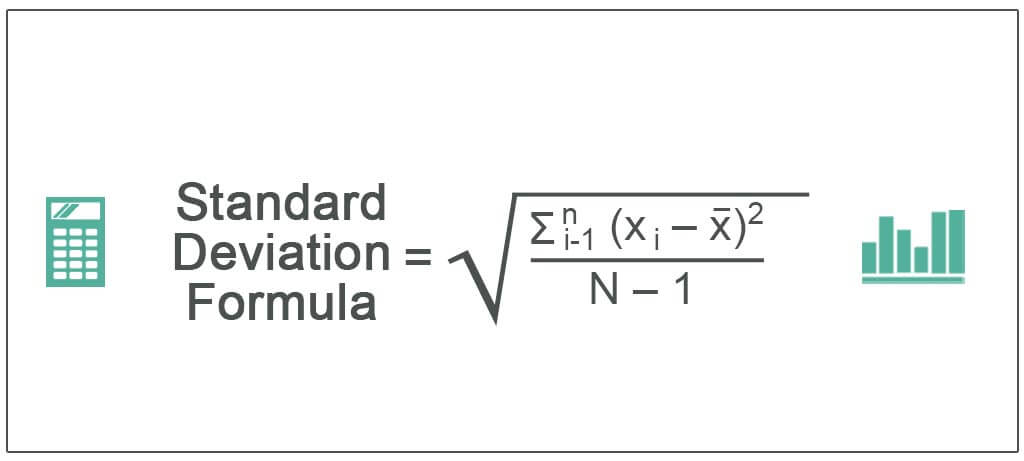

Standardisation et normalisation:

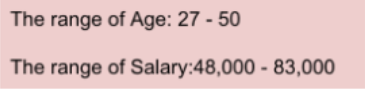

Standardisation: 

Les caractéristiques seront remises à l'échelle pour garantir que la moyenne et l'écart type soient respectivement de 0 et 1

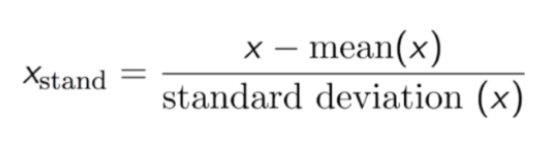

Normaliation:
Cette technique consiste à redimensionner les entités avec une valeur de distribution comprise entre 0 et 1.

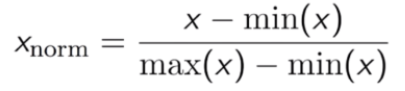



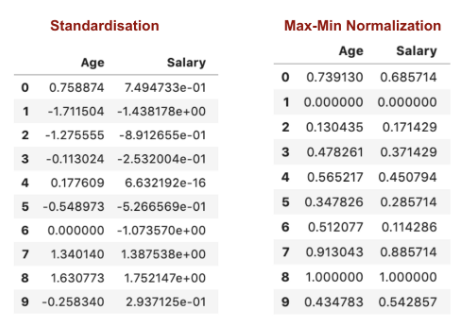


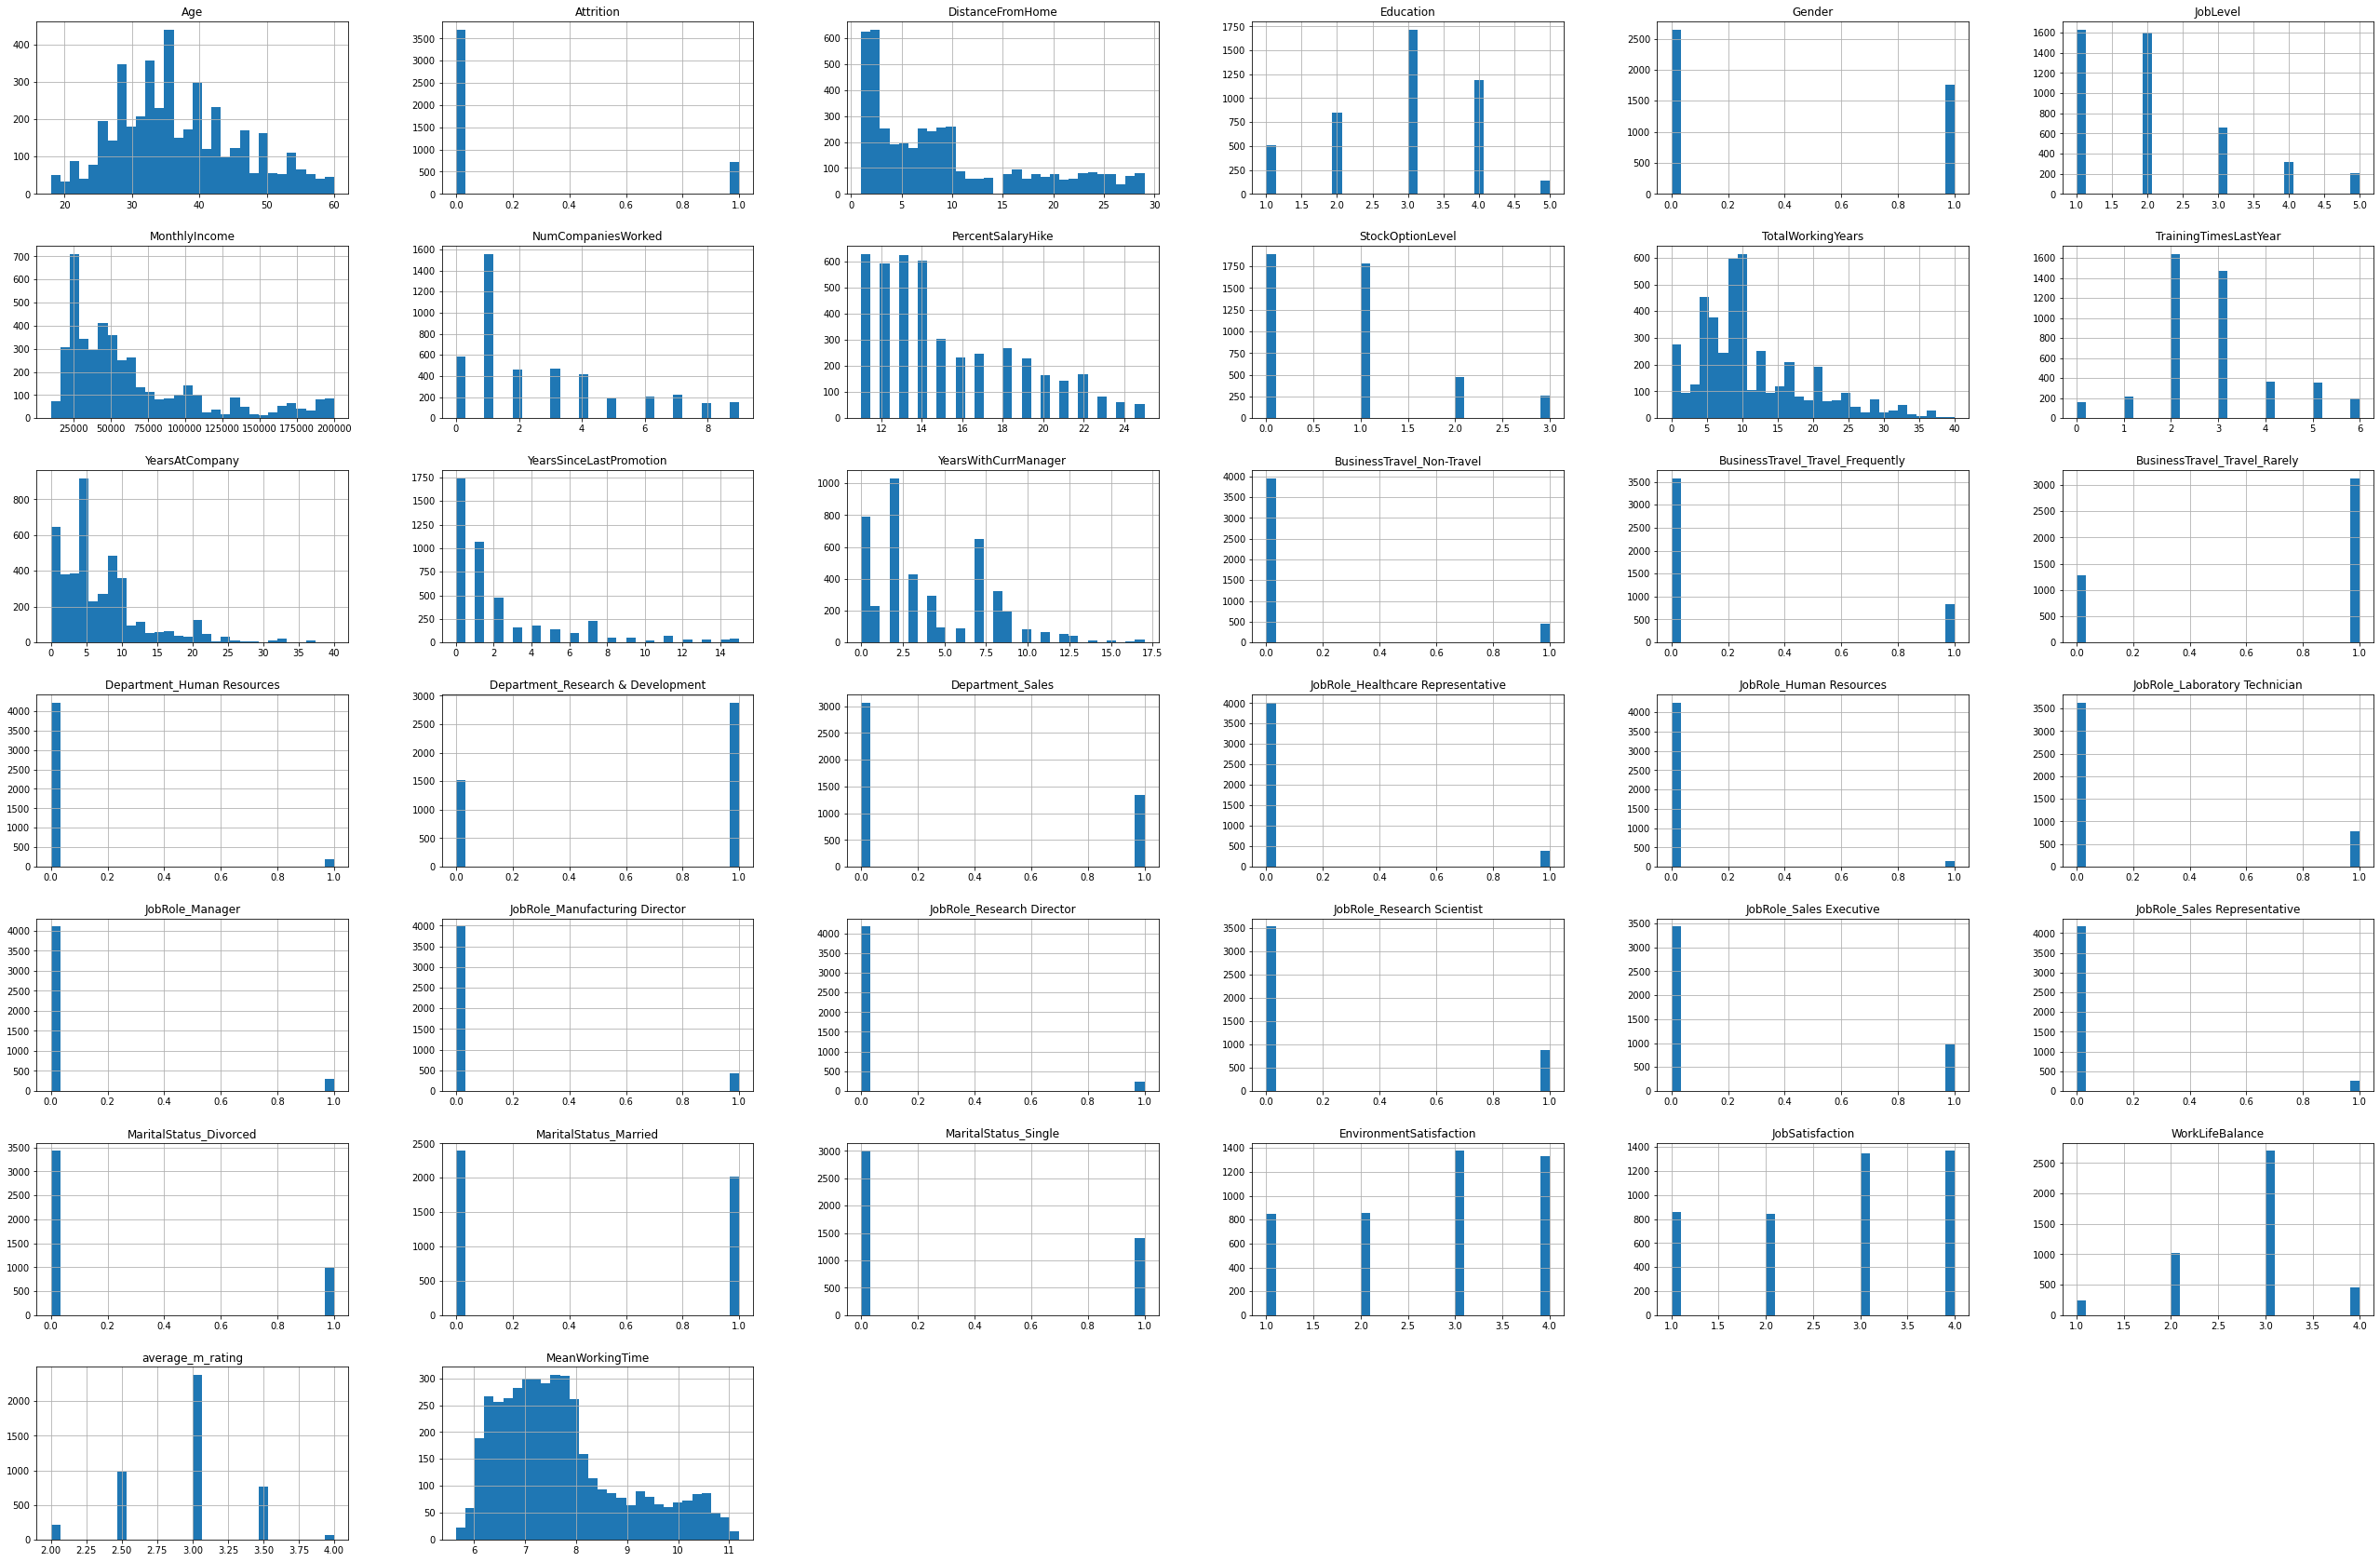

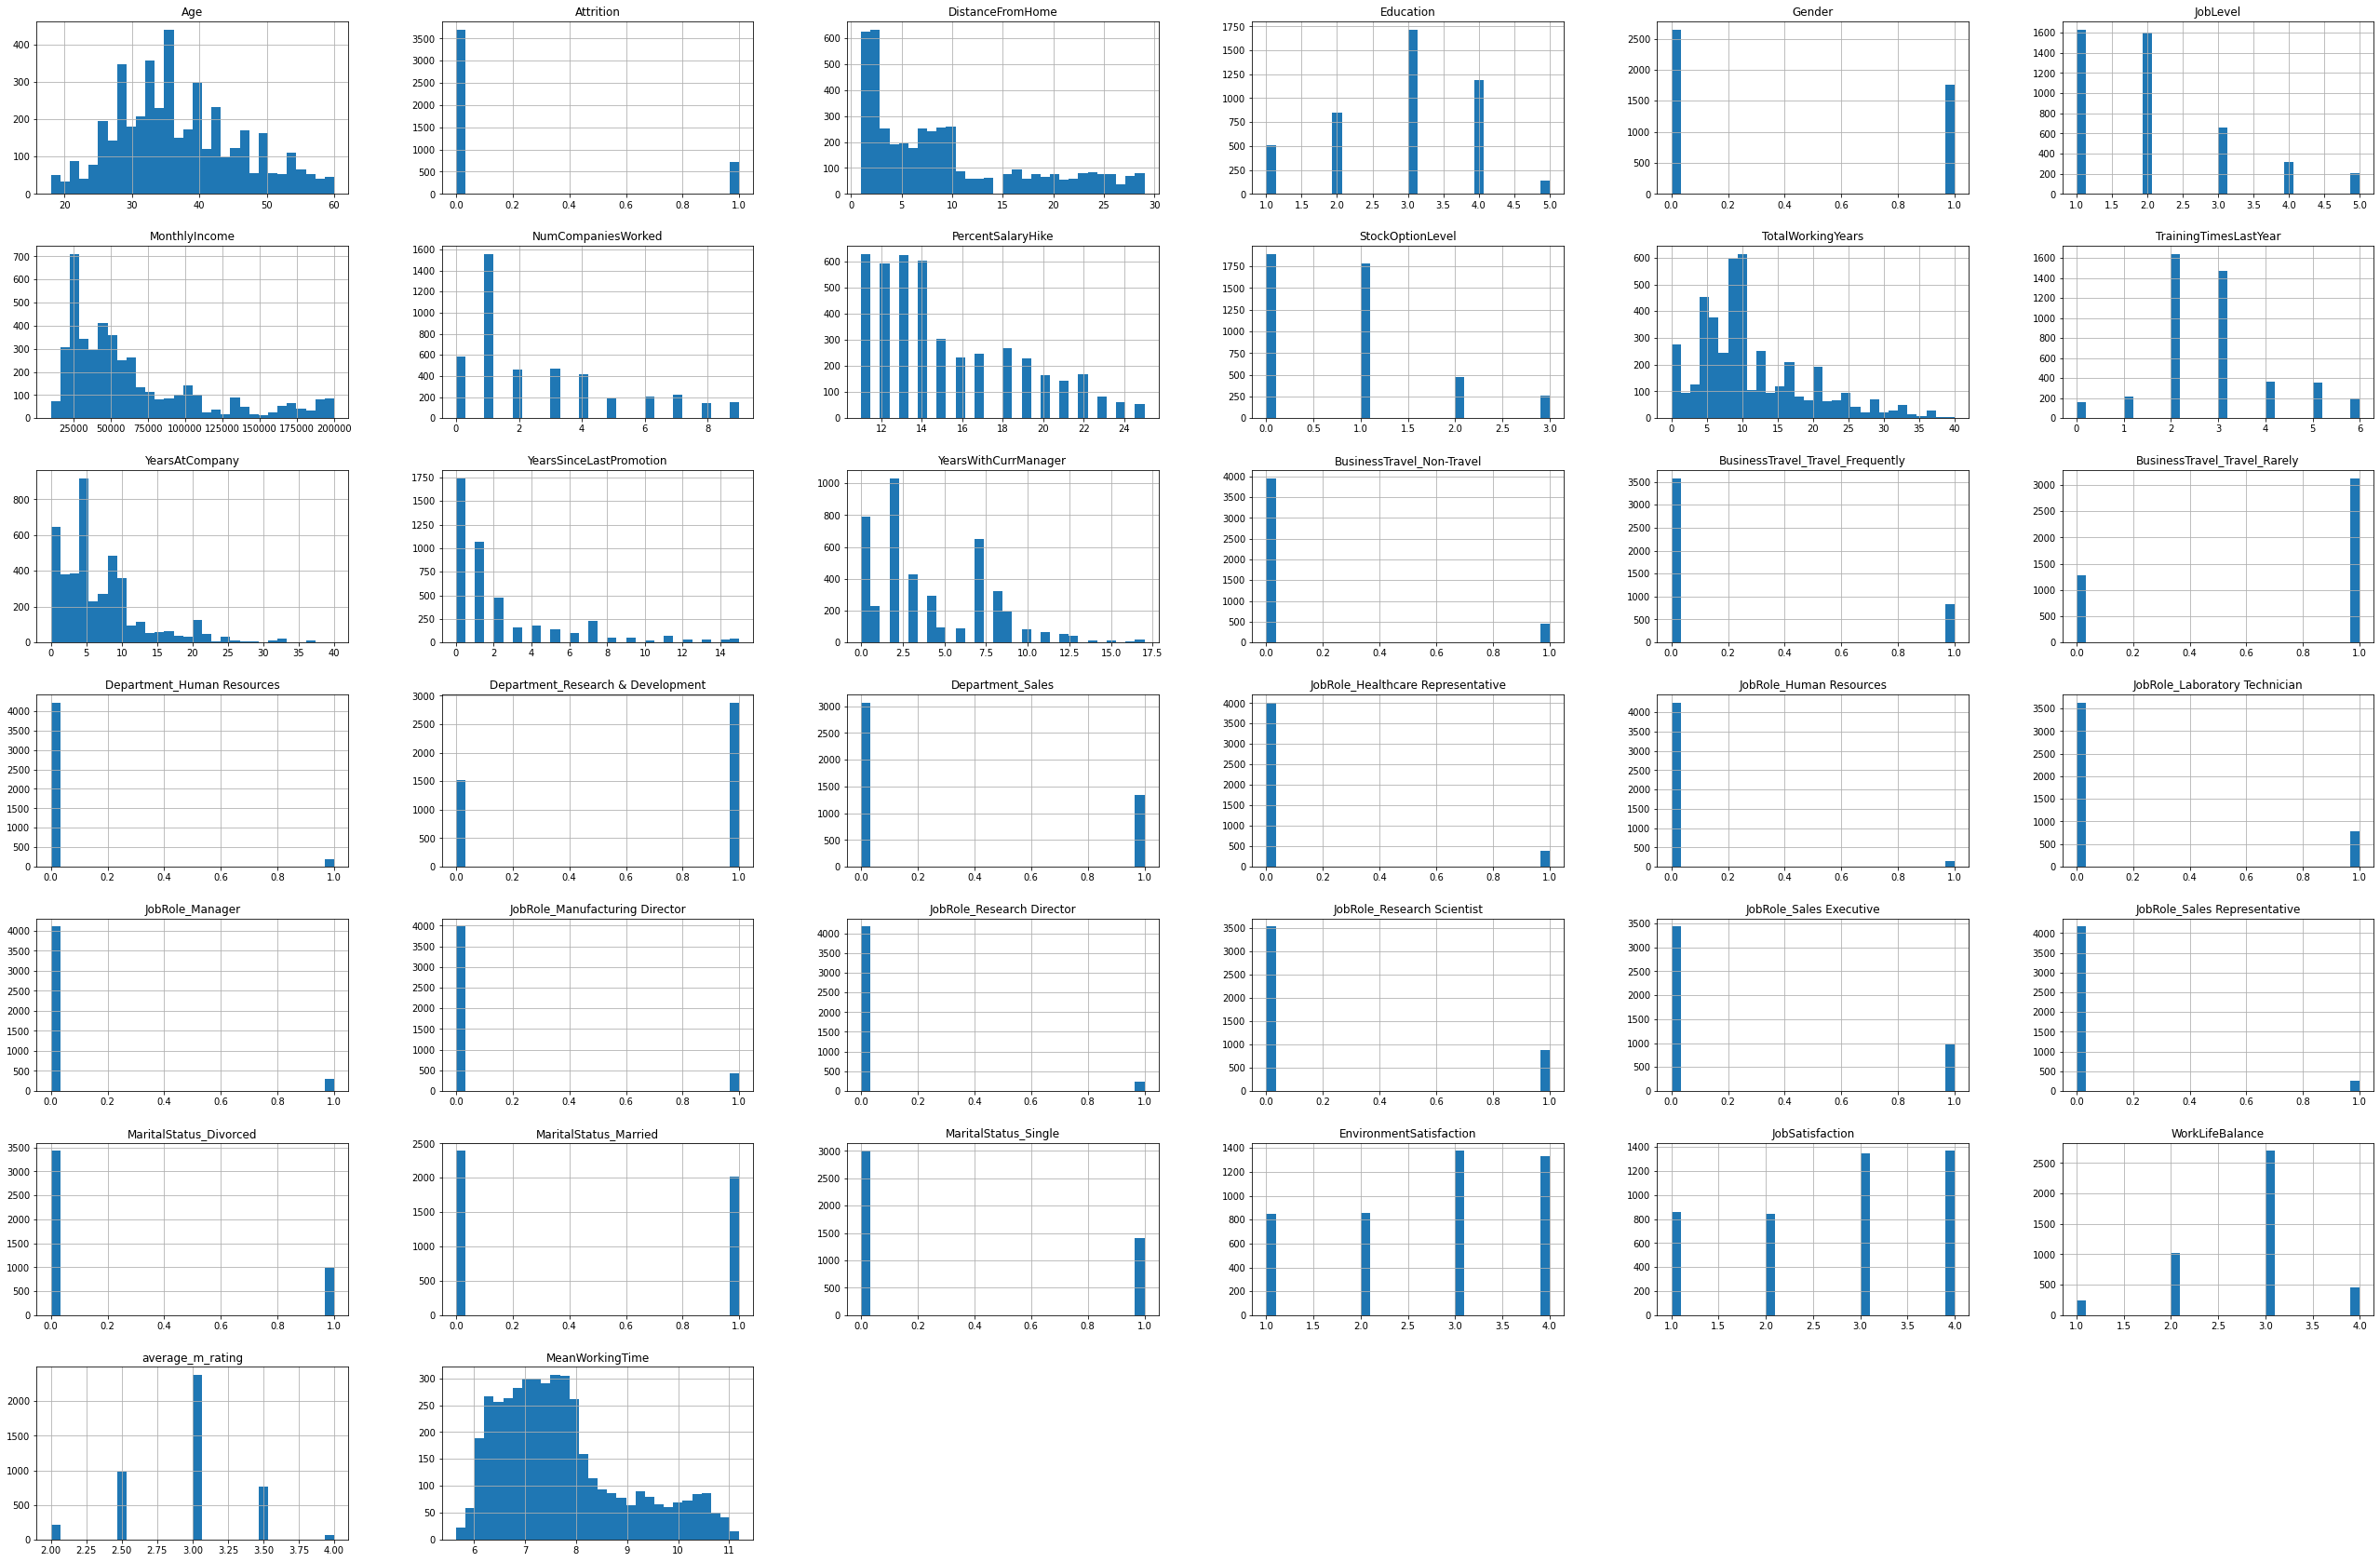

In [18]:
# Visualiser l'histogramme pour chaque feature
df_merged.hist(bins=30, figsize=(45,30))
plt.show()

In [19]:
# Retirer la classe finale du Dataset 
X = df_merged.drop("Attrition",axis=1)
y = df_merged["Attrition"]

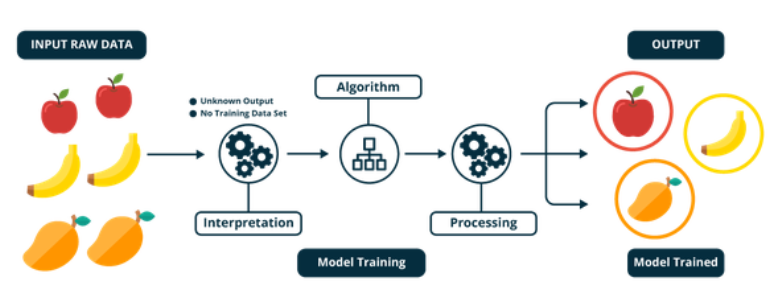

In [20]:
# Normaliser les données en utilisant le z-score 
norm = StandardScaler().fit_transform(X)
X = pd.DataFrame(norm, columns=X.columns)
X

Age  DistanceFromHome  Education    Gender  JobLevel  \
0     1.541369         -0.393938  -0.891688  1.224745 -0.961486   
1    -0.648668          0.099639  -1.868426  1.224745 -0.961486   
2    -0.539166          0.963398   1.061787 -0.816497  1.749610   
3     0.117845         -0.887515   2.038524 -0.816497  0.845911   
4    -0.539166          0.099639  -1.868426 -0.816497 -0.961486   
...        ...               ...        ...       ...       ...   
4405  0.555852         -0.517332   1.061787  1.224745 -0.961486   
4406 -0.867672         -0.887515   1.061787 -0.816497 -0.961486   
4407 -1.305679          1.950552  -0.891688 -0.816497 -0.057788   
4408  0.555852          1.086793  -0.891688 -0.816497 -0.961486   
4409  0.336849          2.320735   0.085049 -0.816497 -0.057788   

      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0          1.405136           -0.678464          -1.150554         -0.932014   
1         -0.491661           -1.079486           2.129306          0.241988   
2          2.725053           -0.678464          -0.057267          2.589994   
3          0.386301            0.123580          -1.150554          2.589994   
4         -0.884109            0.524602          -0.877232          1.415991   
...             ...                 ...                ...               ...   
4405      -0.100700            0.123580           0.489376          0.241988   
4406      -0.812504           -0.277442          -0.057267         -0.932014   
4407      -0.595138           -1.079486           1.309341         -0.932014   
4408      -0.872210           -1.079486          -0.330589          0.241988   
4409      -0.219901           -1.079486          -0.877232         -0.932014   

      TotalWorkingYears  ...  JobRole_Sales Executive  \
0             -1.322079  ...                -0.533821   
1             -0.678877  ...                -0.533821   
2             -0.807517  ...                 1.873287   
3              0.221606  ...                -0.533821   
4             -0.292956  ...                 1.873287   
...                 ...  ...                      ...   
4405          -0.164315  ...                -0.533821   
4406          -0.164315  ...                -0.533821   
4407          -0.807517  ...                 1.873287   
4408          -0.164315  ...                -0.533821   
4409          -0.164315  ...                -0.533821   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
0                        -0.244625               -0.534873   
1                        -0.244625               -0.534873   
2                        -0.244625               -0.534873   
3                        -0.244625               -0.534873   
4                        -0.244625               -0.534873   
...                            ...                     ...   
4405                     -0.244625               -0.534873   
4406                     -0.244625                1.869602   
4407                     -0.244625               -0.534873   
4408                     -0.244625                1.869602   
4409                     -0.244625                1.869602   

      MaritalStatus_Married  MaritalStatus_Single  EnvironmentSatisfaction  \
0                  1.088232             -0.685565                 0.252200   
1                 -0.918921              1.458650                 0.252200   
2                  1.088232             -0.685565                -0.665460   
3                  1.088232             -0.685565                 1.169861   
4                 -0.918921              1.458650                 1.169861   
...                     ...                   ...                      ...   
4405              -0.918921              1.458650                 1.169861   
4406              -0.918921             -0.685565                 1.169861   
4407               1.088232             -0.685565                -1.583120   
4408              -0.918921        

Age  DistanceFromHome  Education    Gender  JobLevel  \
0     1.541369         -0.393938  -0.891688  1.224745 -0.961486   
1    -0.648668          0.099639  -1.868426  1.224745 -0.961486   
2    -0.539166          0.963398   1.061787 -0.816497  1.749610   
3     0.117845         -0.887515   2.038524 -0.816497  0.845911   
4    -0.539166          0.099639  -1.868426 -0.816497 -0.961486   
...        ...               ...        ...       ...       ...   
4405  0.555852         -0.517332   1.061787  1.224745 -0.961486   
4406 -0.867672         -0.887515   1.061787 -0.816497 -0.961486   
4407 -1.305679          1.950552  -0.891688 -0.816497 -0.057788   
4408  0.555852          1.086793  -0.891688 -0.816497 -0.961486   
4409  0.336849          2.320735   0.085049 -0.816497 -0.057788   

      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0          1.405136           -0.678464          -1.150554         -0.932014   
1         -0.491661           -1.079486           2.129306          0.241988   
2          2.725053           -0.678464          -0.057267          2.589994   
3          0.386301            0.123580          -1.150554          2.589994   
4         -0.884109            0.524602          -0.877232          1.415991   
...             ...                 ...                ...               ...   
4405      -0.100700            0.123580           0.489376          0.241988   
4406      -0.812504           -0.277442          -0.057267         -0.932014   
4407      -0.595138           -1.079486           1.309341         -0.932014   
4408      -0.872210           -1.079486          -0.330589          0.241988   
4409      -0.219901           -1.079486          -0.877232         -0.932014   

      TotalWorkingYears  ...  JobRole_Sales Executive  \
0             -1.322079  ...                -0.533821   
1             -0.678877  ...                -0.533821   
2             -0.807517  ...                 1.873287   
3              0.221606  ...                -0.533821   
4             -0.292956  ...                 1.873287   
...                 ...  ...                      ...   
4405          -0.164315  ...                -0.533821   
4406          -0.164315  ...                -0.533821   
4407          -0.807517  ...                 1.873287   
4408          -0.164315  ...                -0.533821   
4409          -0.164315  ...                -0.533821   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
0                        -0.244625               -0.534873   
1                        -0.244625               -0.534873   
2                        -0.244625               -0.534873   
3                        -0.244625               -0.534873   
4                        -0.244625               -0.534873   
...                            ...                     ...   
4405                     -0.244625               -0.534873   
4406                     -0.244625                1.869602   
4407                     -0.244625               -0.534873   
4408                     -0.244625                1.869602   
4409                     -0.244625                1.869602   

      MaritalStatus_Married  MaritalStatus_Single  EnvironmentSatisfaction  \
0                  1.088232             -0.685565                 0.252200   
1                 -0.918921              1.458650                 0.252200   
2                  1.088232             -0.685565                -0.665460   
3                  1.088232             -0.685565                 1.169861   
4                 -0.918921              1.458650                 1.169861   
...                     ...                   ...                      ...   
4405              -0.918921              1.458650                 1.169861   
4406              -0.918921             -0.685565                 1.169861   
4407               1.088232             -0.685565                -1.583120   
4408              -0.918921        

Le Train-Test Split est une méthode d'évaluation en apprentissage automatique qui divise les données en deux ensembles, d'entraînement et de test, pour entraîner et évaluer un modèle. Cette technique estime la capacité du modèle à généraliser sur de nouvelles données. Cependant, la performance estimée dépend de la répartition des données, ce qui peut la rendre moins fiable, surtout avec des données limitées. La validation croisée est une alternative qui pallie ces limites en utilisant plusieurs divisions des données et en calculant la performance moyenne sur ces divisions.

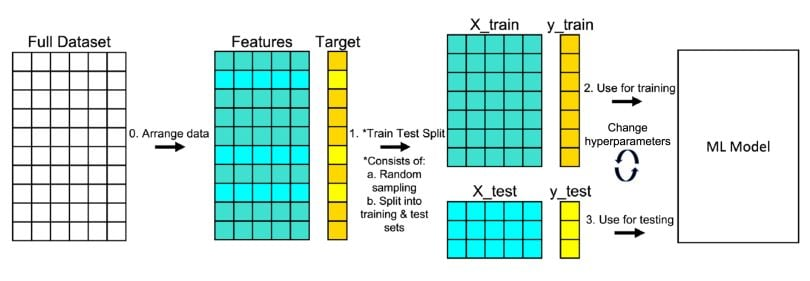




In [21]:
# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [23]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.56it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
XGBClassifier                      0.99               0.99     0.99      0.99   
LGBMClassifier                     0.99               0.98     0.98      0.99   
ExtraTreeClassifier                0.98               0.97     0.97      0.98   
DecisionTreeClassifier             0.98               0.95     0.95      0.97   
BaggingClassifier                  0.98               0.95     0.95      0.98   
SVC                                0.93               0.78     0.78      0.92   
NearestCentroid             

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
XGBClassifier                      0.99               0.99     0.99      0.99   
LGBMClassifier                     0.99               0.98     0.98      0.99   
ExtraTreeClassifier                0.98               0.97     0.97      0.98   
DecisionTreeClassifier             0.98               0.95     0.95      0.97   
BaggingClassifier                  0.98               0.95     0.95      0.98   
SVC                                0.93               0.78     0.78      0.92   
NearestCentroid             

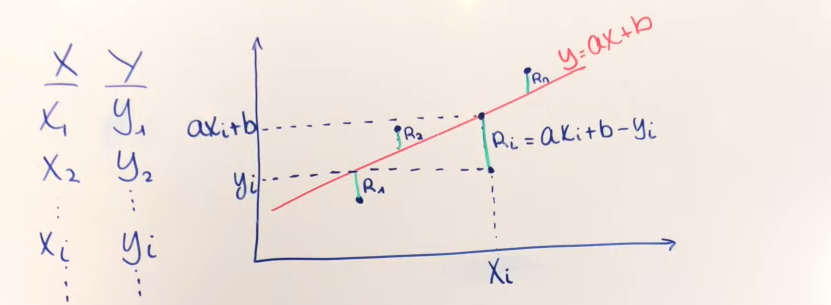
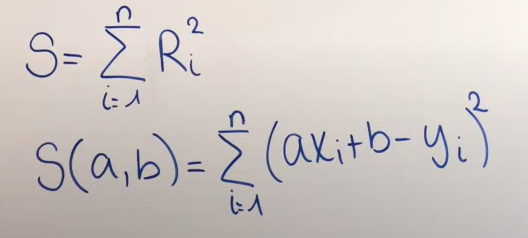

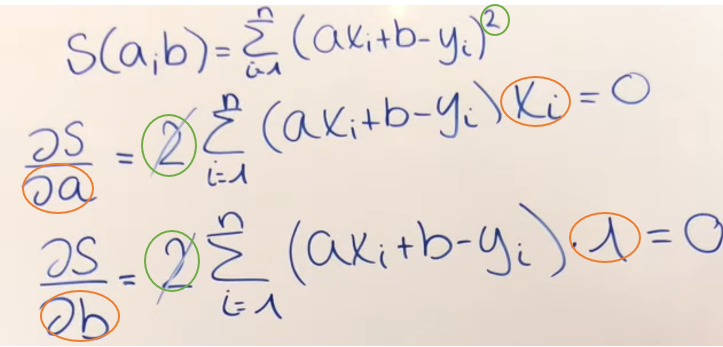
Comme les 2 équations sont égal a 0 on peu éliminer les "2"
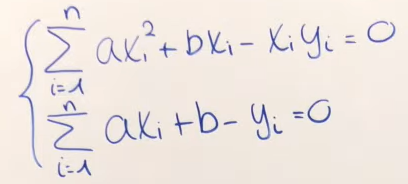

Pour la premiere équation "a" et "b" ne dependent pas de l'indice donc on les sort de l'equation 
Pour la deuxieme on refait pareil pour le "a", de plus la somme de b devien n x constente

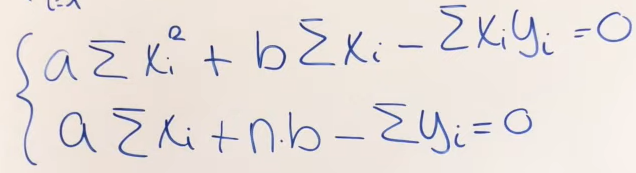

On va tout diviser par "n" pour simplifier les choses

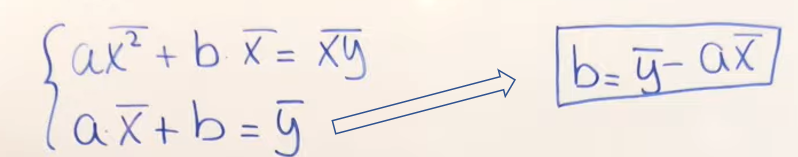

Par la suite on remplace la valeur de "b" trouver à l'aide du second membre du système dans la première équation et on fait une distribution

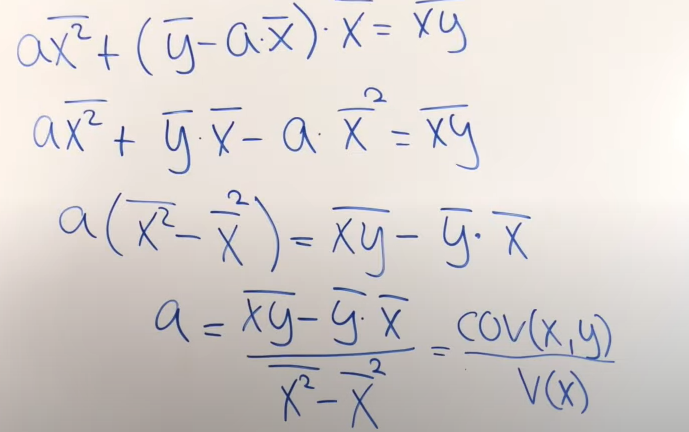

Maintenant que nous avant trouvé le paramètre "a" de l'équation de la droite de régression

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [26]:
print(cross_val_score(reg, X_train, y_train, scoring ="r2", cv=5))

[0.20003103 0.15333882 0.15178073 0.16629412 0.15763798]
[0.20003103 0.15333882 0.15178073 0.16629412 0.15763798]


In [27]:
# C'est important de trouver R2 qui doit être proche de 1 si le modèle est bon
from sklearn.metrics import r2_score
predict_linear  = reg.predict(X_test)
r2 = r2_score(predict_linear, y_test)
r2

-3.9671656650918

-3.9671656650918

Si le modèle choisi s'ajuste moins bien qu'une ligne horizontale, R2 est négatif.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression(random_state=None).fit(X_train, y_train)

In [30]:
print(cross_val_score(log_reg, X_train, y_train,scoring="f1",cv=5))

[0.41463415 0.30573248 0.32051282 0.38461538 0.33121019]
[0.41463415 0.30573248 0.32051282 0.38461538 0.33121019]


La validation croisée est une méthode d'évaluation en apprentissage automatique qui vérifie la capacité d'un modèle à généraliser sur de nouvelles données. Elle divise les données en plusieurs plis et entraîne et évalue le modèle sur chaque pli en utilisant un pli différent comme données de validation à chaque fois. La performance moyenne du modèle sur tous les plis estime sa performance sur de nouvelles données. La validation croisée est avantageuse car elle utilise toutes les données pour l'apprentissage et la validation, offrant une estimation plus fiable et aidant à éviter le surapprentissage.

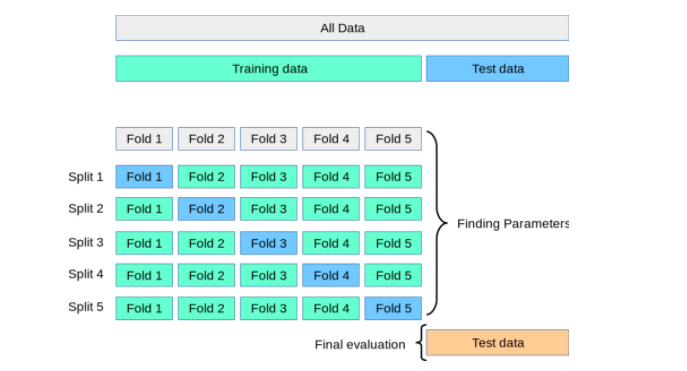

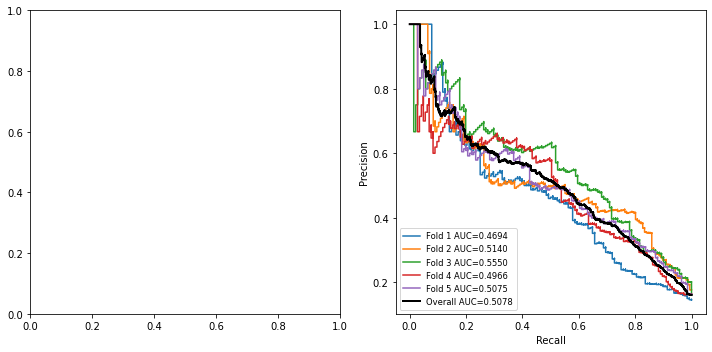

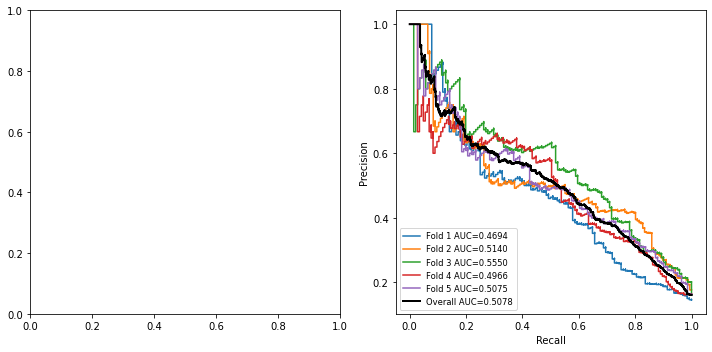

In [31]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold


FOLDS = 5

f, axes = plt.subplots(1, 2, figsize=(10, 5))

k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
predictor = log_reg

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[1].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

y_real = numpy.concatenate(y_real)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[1].step(recall, precision, label=lab, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')

f.tight_layout()

In [32]:
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856481 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856196 (0.011071) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856196 (0.011071) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856196 (0.011071) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.856291 (0.011025) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856291 (0.011025) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856291 (0.011025) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.856385 (0.011151) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856385 (0.011151) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856385 (0.011151) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.856481 (0.010965) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856481 (0.010965) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856387 (0.011206) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.852890 (0.007872) wit

In [33]:
log_reg_tuned = LogisticRegression(random_state=None,C=0.1,penalty= "l2",solver='newton-cg').fit(X_train, y_train)

In [34]:
print(cross_val_score(log_reg_tuned, X_train, y_train,scoring="f1",cv=5))

[0.4        0.30263158 0.31788079 0.36601307 0.28947368]
[0.4        0.30263158 0.31788079 0.36601307 0.28947368]


Le DecisionTreeClassifier est un algorithme de classification supervisé qui construit un arbre de décision en divisant récursivement les données selon les caractéristiques les plus pertinentes. Il est facilement interprétable, gère des caractéristiques numériques et catégorielles et ne nécessite généralement pas de préparation des données. Toutefois, il est sensible aux variations des données d'apprentissage et peut surapprendre. Des méthodes d'ensemble comme RandomForestClassifier ou GradientBoostingClassifier peuvent aider à améliorer la performance et la stabilité.

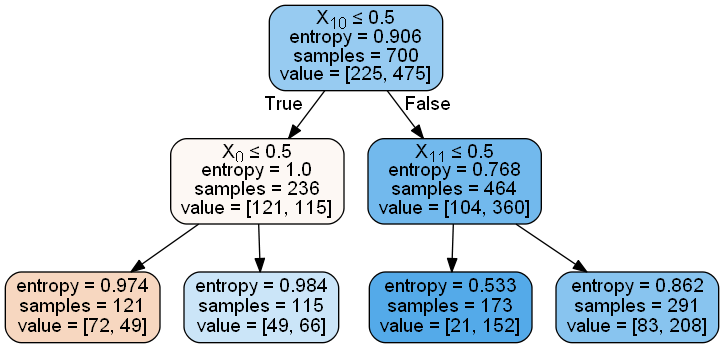

Le RandomForestClassifier est un algorithme de classification supervisé basé sur les méthodes d'ensemble. Il crée plusieurs arbres de décision à partir d'échantillons et de caractéristiques aléatoires et combine leurs prédictions en effectuant un vote majoritaire. Cela réduit le risque de surapprentissage, améliore la performance et la stabilité, et permet une meilleure gestion des caractéristiques non pertinentes ou redondantes.


Le RandomForestClassifier présente plusieurs avantages par rapport à un arbre de décision unique (DecisionTreeClassifier) :
Il réduit le risque de surapprentissage en combinant les prédictions de plusieurs arbres, ce qui conduit généralement à une meilleure performance et une meilleure stabilité.
Il offre une meilleure gestion des caractéristiques non pertinentes ou redondantes, car il sélectionne aléatoirement un sous-ensemble de caractéristiques à chaque division.
Il fournit une estimation de l'importance des caractéristiques en mesurant la réduction moyenne de l'impureté apportée par chaque caractéristique sur l'ensemble des arbres.
Cependant, les inconvénients du RandomForestClassifier incluent une complexité accrue (plusieurs arbres plutôt qu'un seul) et une interprétabilité réduite (il est plus difficile d'expliquer les prédictions d'un ensemble d'arbres que celles d'un arbre unique).

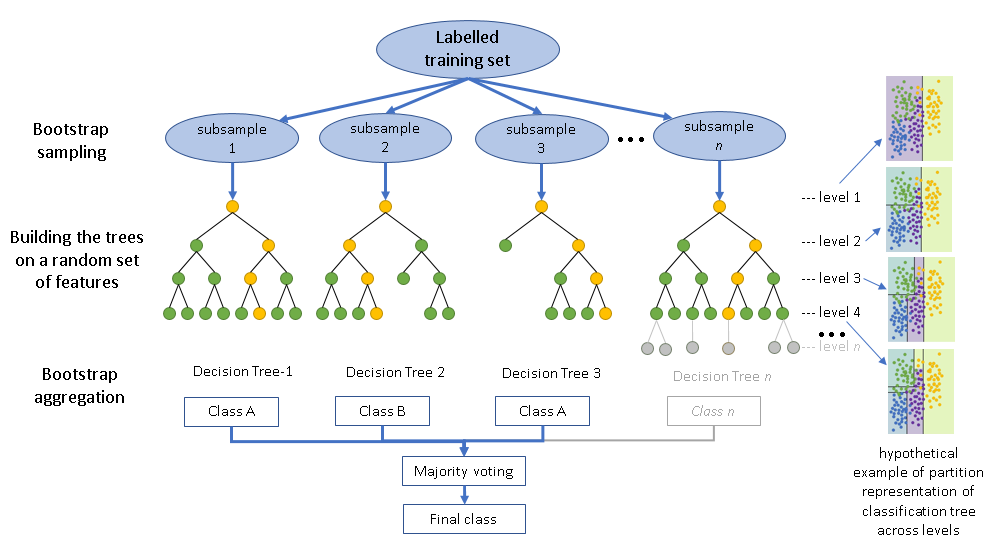

In [35]:
random_forest = RandomForestClassifier(random_state=None).fit(X_train, y_train)

In [36]:
print(cross_val_score(random_forest, X_train, y_train,scoring="f1",cv=5))

[0.93518519 0.93023256 0.91428571 0.88995215 0.88118812]
[0.93518519 0.93023256 0.91428571 0.88995215 0.88118812]


In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
criterion= ['gini', 'entropy', 'log_loss']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring='f1', cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'entropy',
 'bootstrap': False}

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
from sklearn.model_selection import GridSearchCV


# Change depth,leaf,split,estimators based on best param
param_grid = {
    'criterion': [rf_random.best_params_['criterion']],
    'bootstrap': [rf_random.best_params_['bootstrap']],
    'max_depth': [30,35,40,50,60],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [1,2,3,4],
    'n_estimators': [850,950,1000,1100]
}

# Create a based model
rf_tuned = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, scoring='f1',
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['entropy'],
                         'max_depth': [30, 35, 40, 50, 60],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [850, 950, 1000, 1100]},
             scoring='f1', verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 950}

In [ ]:
Random_forest_tuned = RandomForestClassifier(criterion =grid_search.best_params_['criterion'],bootstrap= grid_search.best_params_['bootstrap'],max_depth = grid_search.best_params_['max_depth'],max_features = grid_search.best_params_['max_features'],min_samples_leaf= grid_search.best_params_['min_samples_leaf'],min_samples_split= grid_search.best_params_['min_samples_split'],n_estimators = grid_search.best_params_['n_estimators'])

In [ ]:
Random_forest_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=35,
                       min_samples_split=3, n_estimators=950)

In [ ]:
# Calculate the confusion matrix
y_pred_tuned_model = Random_forest_tuned.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_tuned_model)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold


FOLDS = 5

f, axes = plt.subplots(1, 2, figsize=(10, 5))

k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
predictor = Random_forest_tuned

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[1].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

y_real = numpy.concatenate(y_real)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[1].step(recall, precision, label=lab, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')

f.tight_layout()

In [ ]:
def percentage(predicted,len):
    summ = 0
    for i in predicted:
        if i == 1:
            summ += 1
    p = summ/ len * 100
    return p

In [ ]:
num_rows= y_pred_tuned_model.shape[0]
num_rows
print(percentage(y_pred_tuned_model,num_rows))

In [ ]:
# hyperparameter tuning knn
train_scores = []
test_scores = []
# list des differnt valeur pour n_neighbors
neighbors = range(1, 10)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [ ]:
plt.plot(neighbors, train_scores, label="score des donne d'entrainement")
plt.plot(neighbors, test_scores, label="score des donne de test")
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("nombre de voisin")
plt.ylabel("score de knn")
plt.legend()

print(f"Maximum KNN score sur les donne de test: {max(test_scores)*100:.2f}%")

In [ ]:
# Calculate the confusion matrix
y_pred_tuned_model = knn.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_tuned_model)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
feature_dict = dict(sorted(zip(X.columns, list(Random_forest_tuned.feature_importances_)), reverse=True))
feature_dict

# ANALYSE DES DONNEES ET DE L'IMPORTANCE

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(figsize=(20,12),title="Feature Importance", legend=False);

Comme on peut le voir, on remarque les employés, qui travaillent plus de 8h par jour, quittent plus l'entreprise 

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 0),'MeanWorkingTime'] , color='blue',shade=True, label='No')
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 1),'MeanWorkingTime'] , color='red',shade=True, label='Yes')
plt.title('MeanWorkingTime - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])


In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 0),'MonthlyIncome'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 1),'MonthlyIncome'] , color='r',shade=True, label='Yes')
plt.title('MonthlyIncome Distribution - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

ici c'est assez simple, les employés qui notent l'environnement à 1 ont plus tendance à quitter l'entreprise

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 0),'EnvironmentSatisfaction'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 1),'EnvironmentSatisfaction'] , color='r',shade=True, label='Yes')
plt.title('EnvironmentSatisfaction - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])


Le taux d'attrition commence à baisser après 5 ans dans la sociéte. On peut donc constater qu'une personne avec de l'ancienneté a moins de chance de quitter l'entreprise

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 0),'YearsAtCompany'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 1),'YearsAtCompany'] , color='r',shade=True, label='Yes')
plt.title('YearsAtCompany - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

On peut voir que les personnes avec moins de 2 ans de travail avec leur manager ont plus tendance à quitter l'entreprise


In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 0),'YearsWithCurrManager'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df_merged.loc[(df_merged['Attrition'] == 1),'YearsWithCurrManager'] , color='r',shade=True, label='Yes')
plt.title('YearsWithCurrManager - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

# Architecture de réseau neuronal simple
Un réseau neuronal de base comporte des neurones artificiels interconnectés en trois couches :

Couche d'entrée
Les informations du monde extérieur entrent dans le réseau neuronal artificiel par la couche d'entrée. Les nœuds d'entrée traitent les données, les analysent ou les catégorisent, et les transmettent à la couche suivante.

Couche cachée
Les couches cachées prennent leurs entrées de la couche d'entrée ou d'autres couches cachées. Les réseaux neuronaux artificiels peuvent avoir un grand nombre de couches cachées. Chaque couche cachée analyse la sortie de la couche précédente, la retravaille et la transmet à la couche suivante.

Couche de sortie
La couche de sortie donne le résultat final de tous les traitements de données effectués par le réseau neuronal artificiel. Il peut avoir des nœuds uniques ou multiples. Par exemple, si nous avons un problème de classification binaire (oui/non), la couche de sortie aura un nœud de sortie qui fournira le résultat sous forme de 1 ou 0. Cependant, si nous avons un problème de classification multi-classes, la couche de sortie peut être constituée de plus d'un nœud de sortie.

Architecture de réseau neuronal profond
Les réseaux neuronaux profonds, ou réseaux de deep learning, possèdent plusieurs couches cachées avec des millions de neurones artificiels reliés entre eux. Un nombre, appelé poids, représente les connexions entre un nœud et un autre. Le poids est un nombre positif si un nœud en stimule un autre, ou négatif si un nœud réprime l'autre. Les nœuds ayant des valeurs de poids plus élevées ont plus d'influence sur les autres nœuds.
Théoriquement, les réseaux neuronaux profonds peuvent mettre en correspondance n'importe quel type d'entrée avec n'importe quel type de sortie. Cependant, elles nécessitent également beaucoup plus d'entraînement par rapport aux autres méthodes de machine learning. Ils ont besoin de millions d'exemples de données d'entraînement plutôt que les centaines ou milliers qu'un réseau plus simple pourrait nécessiter.

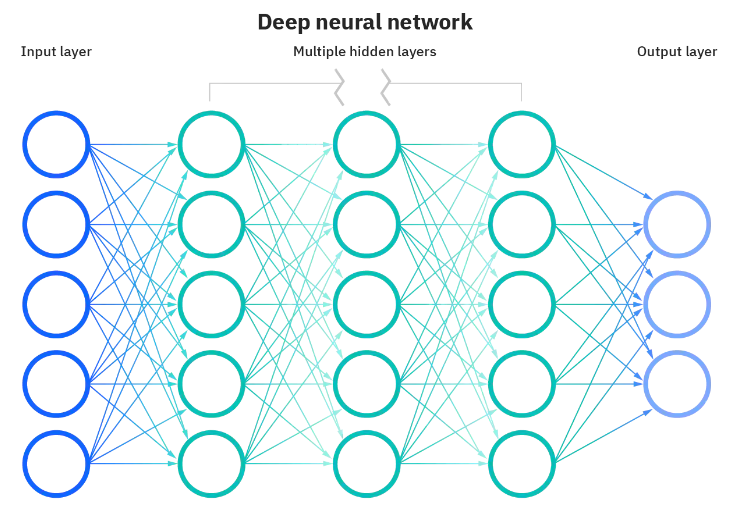

Chaque nœud individuel peut être considéré comme étant son propre modèle de régression linéaire, composé de données d'entrée, de poids, d'un biais (ou d'un seuil) et d'une sortie.

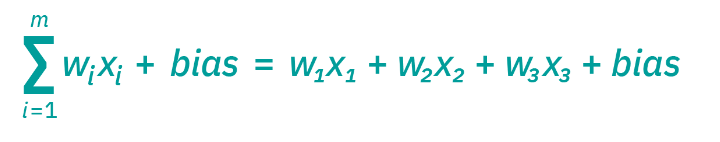

Lorsqu'une couche en entrée est déterminée, des poids sont affectés. Ces poids permettent de déterminer l'importance d'une variable donnée, les poids les plus importants contribuant de façon plus significative à la sortie par rapport aux autres entrées. Toutes les entrées sont ensuite multipliées par leurs poids respectifs, puis additionnées. 

Si cette sortie dépasse un seuil donné, elle "déclenche" (ou active) le nœud, et transmet les données à la couche suivante du réseau. La sortie d'un nœud devient alors l'entrée du nœud suivant. Ce processus, qui consiste à transmettre les données d'une couche à la couche suivante, définit ce réseau neuronal comme un réseau à propagation avant, en anglais feedforward.



Ensuite, prenons l'hypothèse ci-dessous, ce qui nous donne les entrées suivantes :

X1 = 1, parce que les vagues sont grosses
X2 = 0, parce qu'il y a peu de monde sur place
X3 = 1, parce qu'il n'y a pas eu d'attaque récente de requin
Nous devons maintenant affecter des poids pour déterminer l'importance. Les poids plus élevés signifient que certaines variables sont plus importantes pour la décision ou le résultat.

W1 = 5, parce que les grosses houles sont rares
W2 = 2, parce que vous êtes habitué à la foule
W3 = 4, parce que vous avez peur des requins

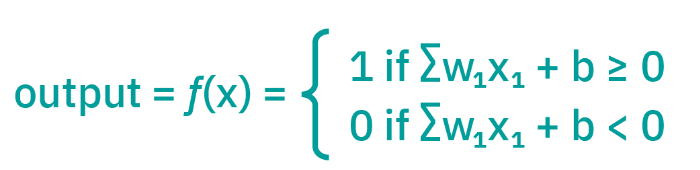

 Au fur et à mesure que nous formons le modèle, nous aurons besoin d'évaluer son exactitude à l'aide d'une fonction de coût (ou de perte). C'est ce que l'on appelle généralement l'erreur quadratique moyenne (MSE). Dans l'équation ci-dessous,

i représente l'index de l'échantillon,
y-hat est le résultat prévu,
y est la valeur réelle, et
m est le nombre d'échantillons.


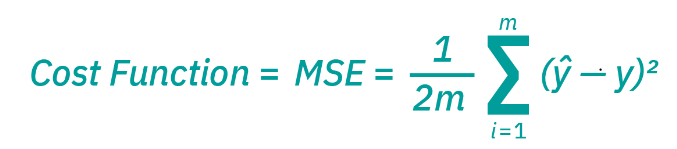

À mesure que le modèle ajuste ses poids et ses biais, il utilise la fonction de coût et l'apprentissage par renforcement pour atteindre le point de convergence, ou le minimum local.

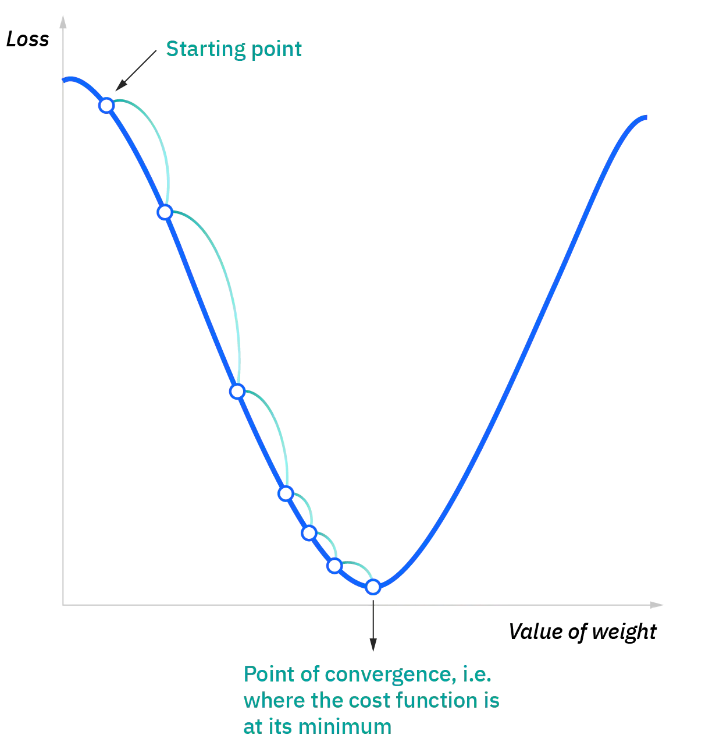

La plupart des réseaux neuronaux profonds sont des réseaux à propagation avant (feedforward), ce qui signifie qu'ils fonctionnent dans une seule direction, de l'entrée vers la sortie. Cependant, vous pouvez aussi former votre modèle par rétropropagation, c'est-à-dire en le faisant fonctionner dans la direction opposée, de la sortie vers l'entrée. La rétropropagation nous permet de calculer et d'attribuer l'erreur associée à chaque neurone.

Le perceptron est le plus ancien réseau neuronal, créé par Frank Rosenblatt en 1958. Il possède un seul neurone et constitue la forme la plus simple d'un réseau neuronal

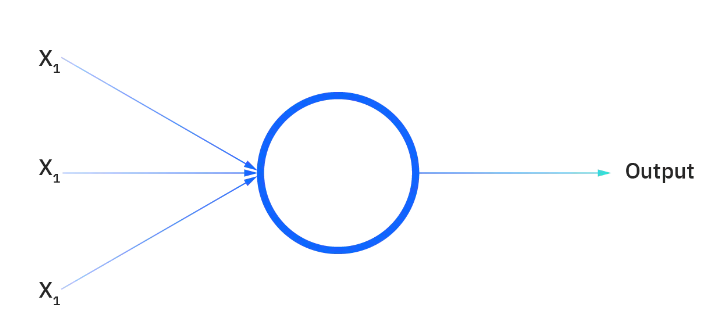

# BONUS : Test d'un Réseau neuronal 

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 250)

# Partie sur l'éthique

# Exploration des données :

Selon la loi de RGPD : 
Le RGPD (Règlement Général sur la Protection des Données) définit les données sensibles comme des informations qui révèlent l'origine raciale ou ethnique, les opinions politiques, les convictions religieuses ou philosophiques, l'appartenance syndicale, les données génétiques, les données biométriques, les données concernant la santé, la vie sexuelle ou l'orientation sexuelle d'une personne physique. Le format des données collectées n'a pas d'importance pour la qualification de données sensibles. Contrairement aux informations confidentielles ou aux secrets industriels, les données sensibles portent un risque d'atteinte aux droits fondamentaux, tel que le respect de la vie privée, et nécessitent une vigilance accrue lors de la collecte et du traitement. Il est important de noter que la qualification juridique d'une donnée peut évoluer si elle est croisée avec d'autres données. Le tableau suivant résume les données considérées sensibles selon les lois RGPD, PIPEDA, HIPAA et FERPA.

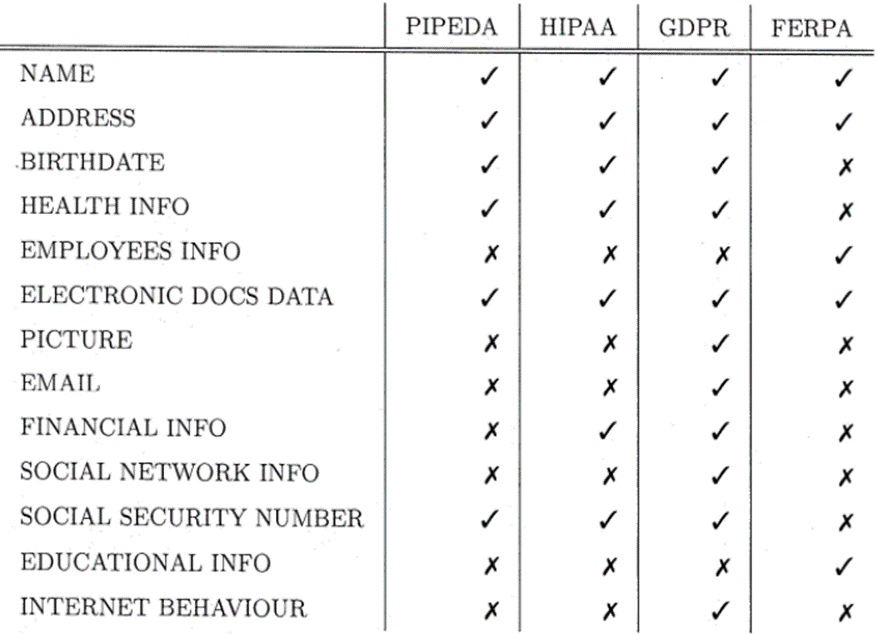

Dans notre cas : 
Le tableau suivant est un récapitulatif des données considérées comme sensibles en fonction de la loi RGPD (remplace la directive 95/46/CE sur la protection des données) qui vise principalement à harmoniser les lois sur la confidentialité et la sécurité des données à travers l'Europe.


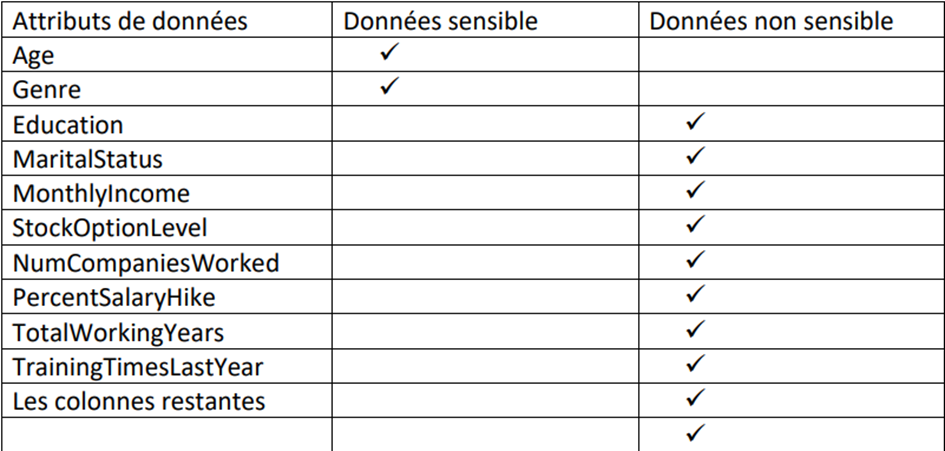


Les exigences éthiques recommandées :


Les avancées technologiques dans le domaine de la science des données ont un impact majeur sur presque tous les aspects de l'activité humaine, mais les dangers liés à l'utilisation abusive des données sont tout aussi évidents. Il est donc important de mettre l'accent sur l'éthique de la science des données. La Commission Européenne recommande 7 exigences pour que les projets d'IA soient éthiques, notamment :

Respect de l'autonomie humaine : 


Le respect de l'autonomie humaine dans la science des données fait référence à l'idée que les données et les algorithmes doivent être utilisés de manière éthique pour préserver la liberté et l'autonomie des personnes concernées. Cela signifie que les décisions prises sur la base de données ne doivent pas limiter l'agence ou l'autonomie des personnes. Pour mettre en place un système qui respecte l'autonomie humaine. 
Cela nécessite que le système d'IA doive à la fois : 
• Se comporter comme Un catalyseur pour une société démocratique, prospère et juste en soutenant les agences utilisatrices. 
• Défendre les droits fondamentaux qui doivent être respectés par le contrôle humain. 

Dans notre cas : 

L'autonomie des salariés au travail est considérée comme un levier d'efficacité et de compétitivité organisationnelle. Elle implique l'initiative, l'auto-organisation et la liberté au travail, indépendamment du niveau hiérarchique. L'étude propose des solutions éthiques pour évaluer les tâches et donner du sens et de la valeur au travail des salariés, tout en respectant la hiérarchie et en encourageant les relations employé-gestionnaire. Ce modèle ne compromet pas l'autonomie humaine ni l'interaction sociale entre les utilisateurs finaux et permet de comprendre les raisons du départ du personnel. Il requiert une intervention humaine "Human in the loop" et dispose d'indicateurs pour surveiller les performances d'auto-apprentissage tels que "Recall" et "F1 score"


Robustesse technique et sécurité : 

La pratique de la data science requiert deux aspects importants : la robustesse technique et la sécurité. La robustesse technique se rapporte à la capacité d'un modèle à fonctionner de manière fiable dans différentes situations. Cela nécessite des données de qualité, des modèles bien conçus et validés, et des résultats fiables et interprétables. La sécurité concerne la protection des données utilisées dans la data science contre les accès non autorisés, les altérations, les fuites ou les pertes. En tant que data scientist, il est essentiel de prendre en compte ces deux aspects dès le début de tout projet de data science pour garantir des résultats fiables et la protection des données.


Dans notre cas : 

Le modèle doit être utilisé de manière appropriée et sans impact négatif sur la société. Les employés sont conscients des risques associés aux données fournies au modèle, notamment la possibilité que les données soient corrompues ou incorrectes. La stabilité du modèle dépend du nombre et du type de données, ainsi que de la qualité des caractéristiques choisies. Avant de former le modèle, les variables avec la meilleure qualité de données ont été triées et sélectionnées, et des valeurs ont été ajoutées aux variables manquantes. Pour évaluer en permanence la qualité des résultats du système, les paramètres suivants sont utilisés : 

-	Score de rappel
-	Précision
-	Résultat F1
-	Courbe ROC


Confidentialité et gouvernance des données : 

La confidentialité et la gouvernance des données sont des concepts clés en data science pour protéger les données personnelles et sensibles des individus et des organisations. La confidentialité des données nécessite des mesures de sécurité pour restreindre l'accès et l'utilisation abusive des données, tandis que la gouvernance des données vise à garantir que les données sont collectées, stockées, utilisées et partagées de manière éthique et responsable, en respectant les règles et les réglementations en vigueur. La gouvernance des données comprend également la qualité des données, la sécurité des données, la conformité réglementaire, la gestion des risques et la transparence.

Dans notre cas :

Le modèle de l'entreprise respecte la confidentialité, la vie privée et l'intégrité en ne traitant que des données identifiées par un ID employeur, ce qui préserve l'anonymat et la confidentialité des sujets. Des mesures techniques telles que le chiffrement et les canaux de communication sécurisés sont en place pour protéger les données. La confidentialité et la gouvernance des données sont des préoccupations majeures en data science, et il est essentiel que les professionnels adoptent une approche responsable et éthique en matière de gestion des données en respectant les réglementations en vigueur et en assurant la protection des données des individus et des organisations.

Transparence :

La transparence en data science désigne la capacité d'un modèle ou d'un processus à fournir une explication claire et compréhensible de son fonctionnement interne, de ses prédictions et de ses résultats. Elle peut être améliorée en utilisant des techniques telles que la documentation détaillée du code, la visualisation des données et l'utilisation d'algorithmes explicables. La transparence est essentielle dans les domaines où les décisions prises à partir de données ont un impact direct sur la vie des individus, tels que les services financiers et la justice, car elle permet une meilleure compréhension de la façon dont les décisions sont prises et des raisons pour lesquelles certaines personnes peuvent être avantagées ou désavantagées par un modèle ou un processus donné.

Dans notre cas : 

La transparence envers les employés est très importante aujourd'hui. Informer les employés sur la collecte, l'utilisation et la divulgation d'informations est essentiel afin de respecter les aspects juridiques de la recherche. Le consentement des employés sur le fait d’exploiter leurs données est indispensable au développement de la confiance tout au long de notre étude. Un document attestant cela doit être signé et vérifié par tous les employés certifiant que l’utilisation des données a été approuvée. Tous en respectant les trois règles de transparence : 

1) la traçabilité 
2) l'explicabilité 
3) une communication ouverte sur les limites du système d'IA. 


Cette étape doit être complétée avant le début de l’étude. 

Diversité, non-discrimination et équité :

Pour obtenir une IA fiable, l'intégration et la diversité sont essentielles tout au long du cycle de vie d'un système IA. Les systèmes d'IA peuvent souffrir de biais historiques involontaires, d'imperfections et d'une mauvaise gestion. La persistance de ces préjugés peut conduire à des préjugés implicites et à une discrimination non intentionnelle à l'encontre de certains groupes ou individus, ce qui peut encore exacerber les préjugés et l'exclusion. Le préjudice peut également résulter de l'exploitation délibérée des préjugés (des consommateurs) ou de pratiques concurrentielles déloyales telles que l'homogénéisation des prix par la collusion ou l'opacité des marchés. Les biais identifiables et discriminatoires doivent être éliminés au stade de la collecte dans la mesure du possible. Les systèmes d'IA doivent être centrés sur l'utilisateur et conçus de manière que les produits ou services d'IA puissent être utilisés par n'importe qui, indépendamment de l'âge, du sexe, des capacités ou des caractéristiques.
L'accessibilité de cette technologie aux personnes handicapées, qui se retrouvent dans tous les groupes sociaux, revêt une importance particulière. 

Dans notre cas : 

Les paramètres considérés et utilisés dans notre étude ne sont pas principalement axés sur les facteurs discriminants. Veiller à ce que l'IA ne soit pas utilisée de manière néfaste qui exacerbe les inégalités et la division (discrimination, égalité, etc.). En effet, vous constaterez que les paramètres étudiés n'ont rien à voir avec la nationalité, le sexe ou la peau (couleur) ou religion. Bien sûr, nous avons effectué nos recherches en ignorant les paramètres du genre, l’Age et de l'état matrimonial, mais il s'agit essentiellement de trouver les bonnes solutions pour chaque partie. Par exemple, une travailleuse mariée enceinte doit bénéficier des choses nécessaires, à savoir les commodités et la considération de ses jours de repos, une telle situation punirait les travailleuses ou futures travailleuses pour dépendance. Sur la base de l'état civil, par exemple, une jeune femme mariée peut être refuser parce que l'entreprise craint qu'elle ait un enfant et dépense plus de temps pour sa famille et néglige son emplacement eu sein de l’entreprise. En somme, la diversité, la non-discrimination et l'équité en data science sont des principes importants qui garantissent que les algorithmes et les décisions basées sur les données sont justes et équitables pour toutes les personnes, sans égard à leurs caractéristiques personnelles. 


Bien-être environnemental et sociétal : 

Le bien-être environnemental et sociétal en data science se réfère à l'utilisation de données et d'analyses pour évaluer et améliorer le bien-être des populations et de l'environnement. Cela peut inclure l'utilisation de données pour comprendre les tendances environnementales, telles que pour suivre les résultats sociaux ainsi que l'éducation, la santé et l'équité économique. 
Les données peuvent également être utilisées pour identifier les lacunes dans les politiques environnementales et sociales, mais aussi pour évaluer l'impact des politiques existantes. En utilisant les données pour mesurer le bien-être environnemental et sociétal, les décideurs politiques et les organisations peuvent prendre des décisions plus informées pour améliorer la qualité de vie des populations et protéger l'environnement. Dans le domaine de la data science, l'analyse de données et l'apprentissage automatique peuvent être utilisés pour détecter les tendances et les anomalies dans les données environnementales et sociales. Les modèles prédictifs peuvent être utilisés pour évaluer les impacts futurs des politiques et des programmes sur le bien-être environnemental et sociétal.

Dans notre cas : 

Bien que les systèmes d'IA puissent être utilisés pour améliorer les compétences sociales, ils peuvent également contribuer à leur détérioration, cela pourrait également affecter le bien-être physique et mental des personnes au sein de l’entreprise. Nous entendons par là que l'entreprise a la responsabilité et la nécessité d'intégrer les conséquences de ses décisions dans le bien-être de ses parties prenantes et de s'inscrire dans une démarche de long terme. Et c'est exactement ce que nous avons essayé de faire avec nos recherches. Trouver des solutions adéquates et appropriées qui créeraient un climat social harmonieux et donneraient envie de travailler aux employés, facilitant entre autres :
 - la minimisation des déplacements des employés pour améliorer la qualité de vie des salariés au travail.
 
Le bien-être environnemental et sociétal en data science consiste à utiliser les données pour améliorer la qualité de vie des populations et protéger l'environnement en prenant des décisions éclairées basées sur des données objectives et scientifiques. 


Responsabilité : 

Le principe de responsabilité exige l'introduction de mécanismes qui garantissent la responsabilité du développement, de la mise en œuvre et/ou de l'utilisation des systèmes d'intelligence artificielle. Ce sujet est étroitement lié à la gestion des risques, identifiant et atténuant les risques d'une manière transparente qui peut être expliquée et examinée par des tiers. En cas d'impacts injustes ou négatifs, des mécanismes de responsabilisation doivent être en place pour garantir une possibilité adéquate de réparation. En d’autres termes une responsabilité en data science fait référence à l'obligation éthique de veiller à ce que les analyses et les décisions prises à partir des données soient justes, équitables, précises, fiables et transparentes.

Dans notre cas :

En tant que data scientistes, nous sommes responsable de la qualité et de la pertinence des données que nous utilisons, de la rigueur méthodologique de nos analyses et de la communication claire et transparente des résultats. 
Cela inclut également la prise en compte des impacts potentiels de nos analyses et décisions sur les individus, les groupes et la société dans son ensemble. Par exemple, l'utilisation de données biaisées peut entraîner des décisions discriminatoires qui affectent négativement certains groupes de personnes. 

Il est donc crucial de comprendre les conséquences éthiques de nos actions et de travailler à minimiser les risques pour les personnes concernées. Les responsabilités en data science sont donc liées à l'éthique et à la responsabilité sociale, et doivent être considérées comme faisant partie intégrante de la pratique de la science des données.
